<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Machine_Learning/3_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%EB%B0%8F_%EC%95%99%EC%83%81%EB%B8%94_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 트리 모델
- 의사결정나무 (Decision Tree) - 분류와 회귀 모두에 다 사용할 수 있다.

의사결정 나무는 선형으로 분류 하는 것이 아닌 **노드**라는 이름의 데이터에 대한 질문지를 만들게 된다.

순수 노드란, 더 이상 질문지를 만드는 것이 무의미한 노드를 의미한다. 결정 경계 안에 있는 클래스의 갯수가 한 쪽이 0개이면 순수 노드가 된다.

의사결정나무는 기본적으로 과적합을 기본으로 한다. 따라서 복잡도를 제어하기 위해서는 사전 가지치기 또는 사후 가지치기 방법을 사용한다. 사이킷 런은 사전 가지치기 방법을 제공한다.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

tree = DecisionTreeClassifier(random_state=0) # random_state: 언제나 똑같은 질문지를 만들기 위함
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [5]:
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


#### 위에서 훈련 세트의 정확도가 100%가 나온 이유는?
모든  리프 노드가 순수 노드가 됐기 때문

In [7]:
# 사전 가지치기 적용하기
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


#### 트리 모델은 예측으로서도 성능이 괜찮다
 근데 특성 중요도를 볼 수도 있음.. (트리 모델의 분석 메리트)

In [8]:
print("특성 중요도 : \n{}".format(tree.feature_importances_))

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


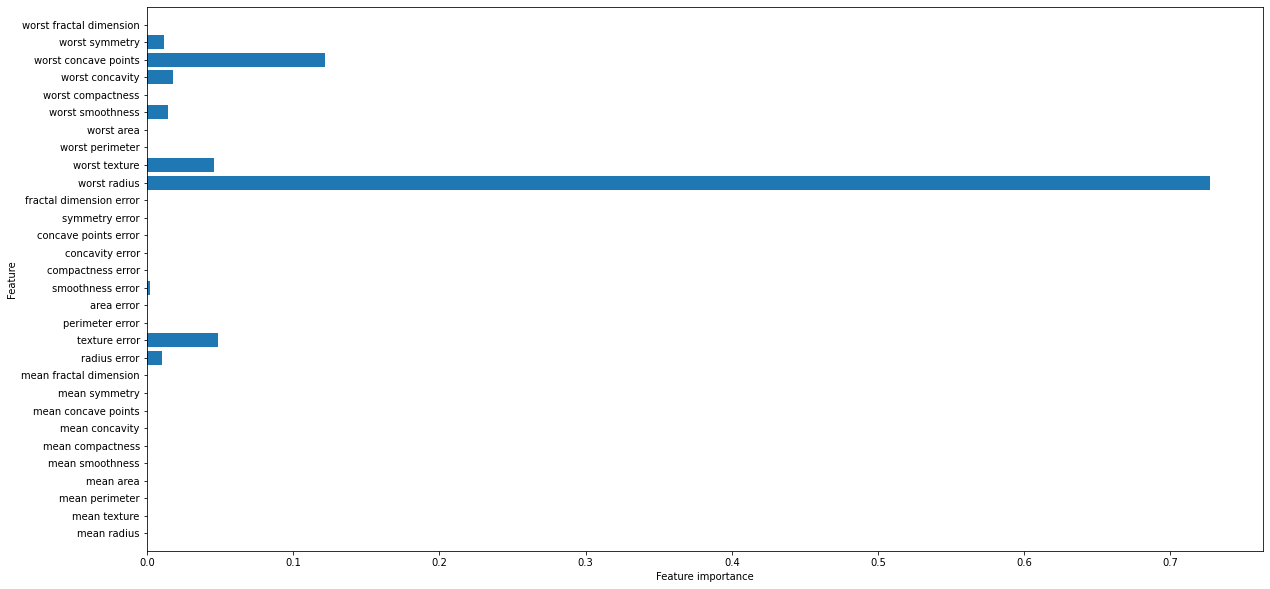

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(20, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

#### 특성에 대한 선형 모델과 트리 모델의 차이점
  - 선형 모델: 가중치(weight)를 사용함: 음수/양수로 구분이 된다. 가중치가 음수면 음성 클래스를 지지함. 가중치가 양수면 양성 클래스를 지지한다.
  - 트리 모델: 특성 중요도만 확인하기 때문에 음성과 클래스를 지지하는지, 양성 클래스를 지지하는지 알 수가 없다.

In [12]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f5743f380c22174b18242172e72bd9587521e51df564e7555848efc2db7b5c58
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [13]:
import os
import mglearn
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

In [14]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


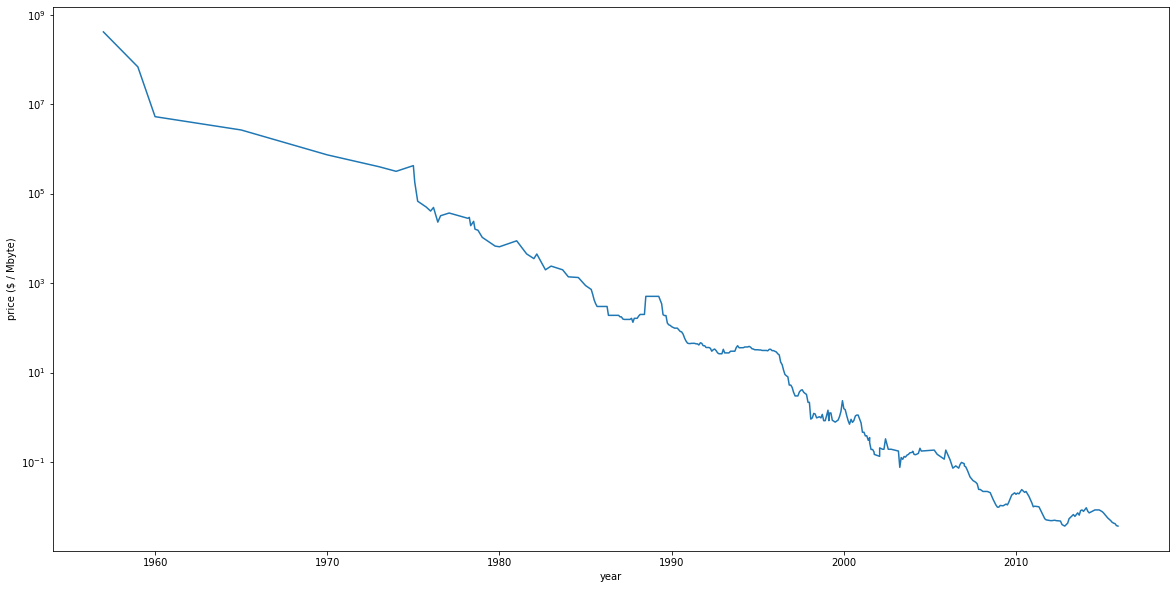

In [15]:
plt.figure(figsize=(20, 10))
# semilogy: y축 값의 스케일이 너무 큼
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel("price ($ / Mbyte)")
plt.show()

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 하기 위해 날짜 특성만을 이용
# 모델에 데이터를 훈련시키기 위해서는 반드시 2차원 배열이어야만 한다.
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 관계를 간단하게 하기 위해서 로그스케일 적용
y_train = np.log(data_train.price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


In [31]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
lin_reg = LinearRegression().fit(X_train, y_train)

In [32]:
# 예측용 데이터 만들기 (전체 기간)

# 예측용, 테스트용 데이터는 무조건 train데이터와 shape[-1]의 값이 똑같아야 한다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr   = lin_reg.predict(X_all)

# semilogy 시각화를 사용할 것이기 때문에 로그스케일의 값을 원래대로 복구하기
price_tree = np.exp(pred_tree)
price_lr   = np.exp(pred_lr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


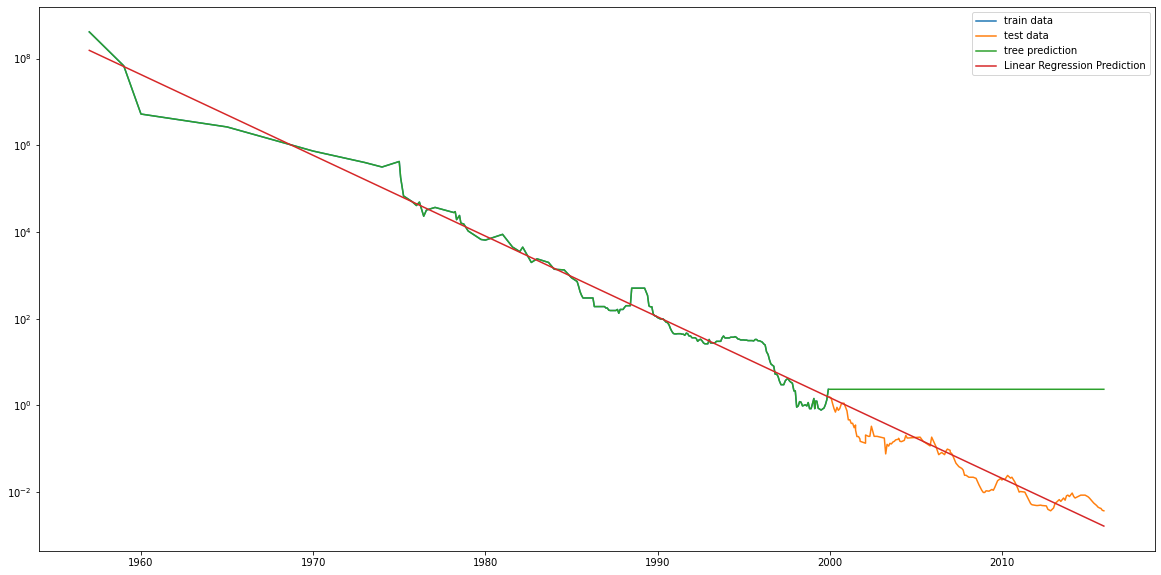

In [33]:
plt.figure(figsize=(20, 10))
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()
plt.show()

## 앙상블 모델

* 랜덤 포레스트 (RandomForest)
* 그래디언트 부스팅(Gradient Boosting)

둘 다 결정 트리 기반

## 랜덤 포레스트

* 과적합이 되어있는 트리를 여러개 준비합니다.
* 과적합된 트리는 **각각 다른 방향**으로 예측을 한다.
* 각각 다른 방향 : 무작위 특성을 활용해서 예측 한다.
* 무작위성을 부여하는 과정 : **부트스트랩 샘플링(Bootstrap Sampling)**이라고 한다.
* 부트스트랩 샘플링은 전체 데이터 특성(feature)에서 무작위로 의사결정트리를 위한 feature로 선정하는 방식

주요 하이퍼 파라미터
* n_estimators : 랜덤 포레스트에서 사용할 나무의 개수. 나무가 많아지면 많아질 수록 복잡도가 증가
* max_features : 부트스트랩 샘플링에 영향을 미친다. 나무에 사용할 샘플의 개수
 * max_features의 값이 전체 특성의 개수와 같다면 무작위성이 안들어 간다. 즉 모든 나무가 똑같은 예측을 해요
 * max_features가 1이면 완전 무작위가 된다. 즉 하나의 트리에 하나의 특성이 여러개가 등록될 수도 있게 된다.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

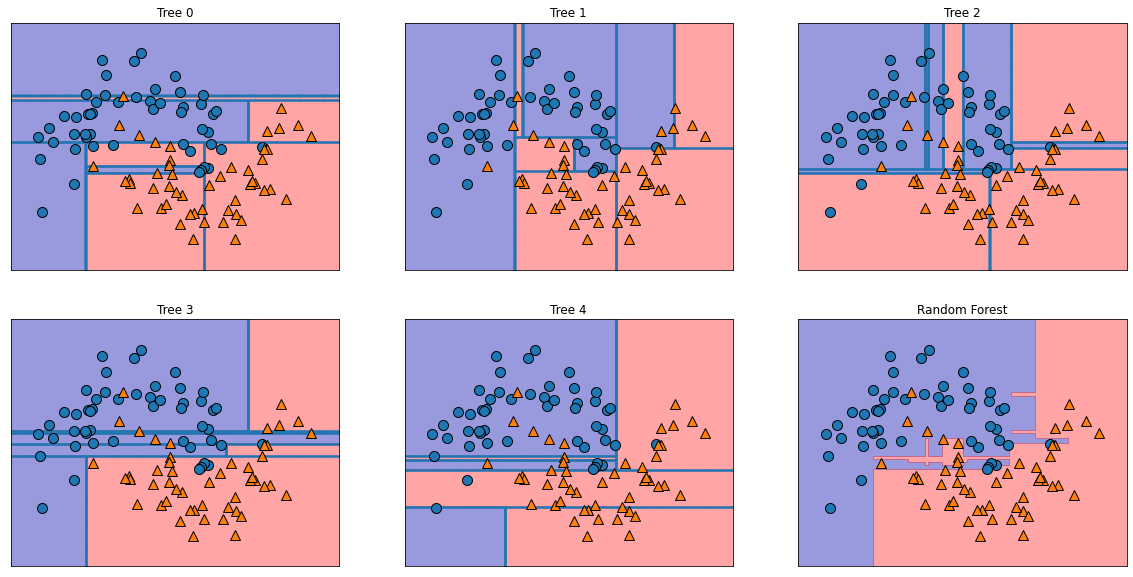

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

랜덤 포레스트는 과대적합 되어있는 여러개의 트리들을 평균 낸다.

In [38]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


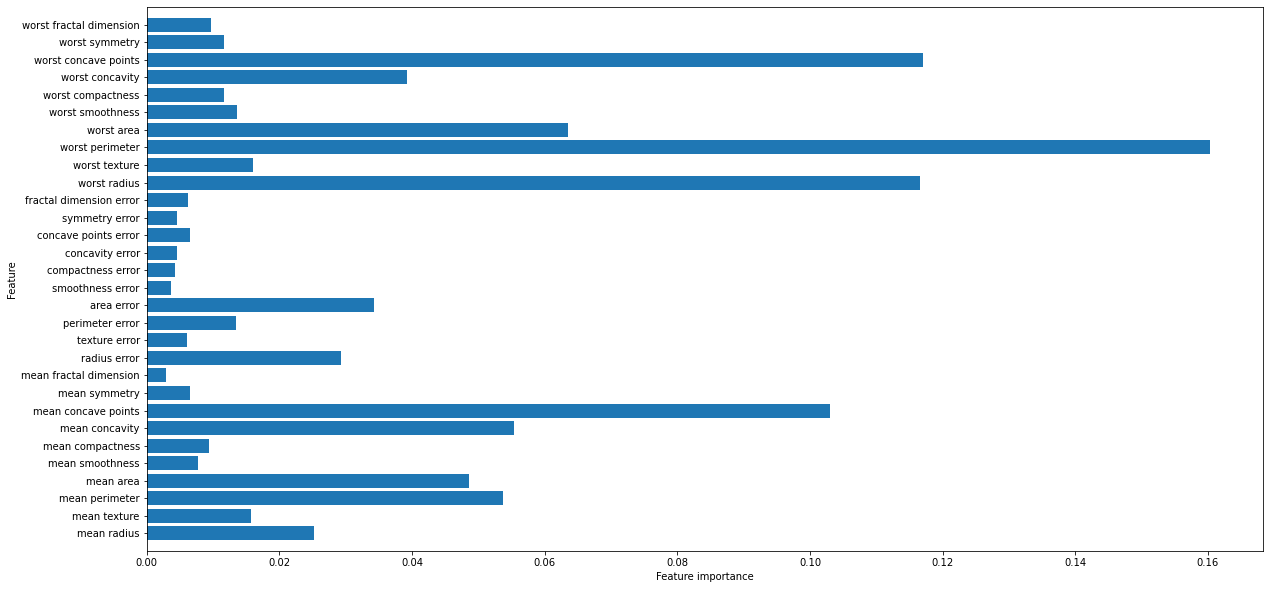

In [39]:
plot_feature_importances_cancer(forest)

## 그라디언트 부스팅 회귀 트리
* 분류와 회귀 모두에서 사용이 가능
* 과소적합된 트리를 여러개 이어가면서 학습시키는 방법(집단지성)
* 모든 특성을 사용하며, 약한 학습기를 여러개 이어 붙이는 방식

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [41]:
gbrt

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

일반적으로 그라디언트 부스팅 회귀 트리는 learning_rate, max_depth 하이퍼 파라미터로 복잡도를 조절한다.

In [42]:
# 최대 깊이(max_depth) 조절하기
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))   

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [43]:
# 학습률(learning_rate) 조절하기
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))   

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


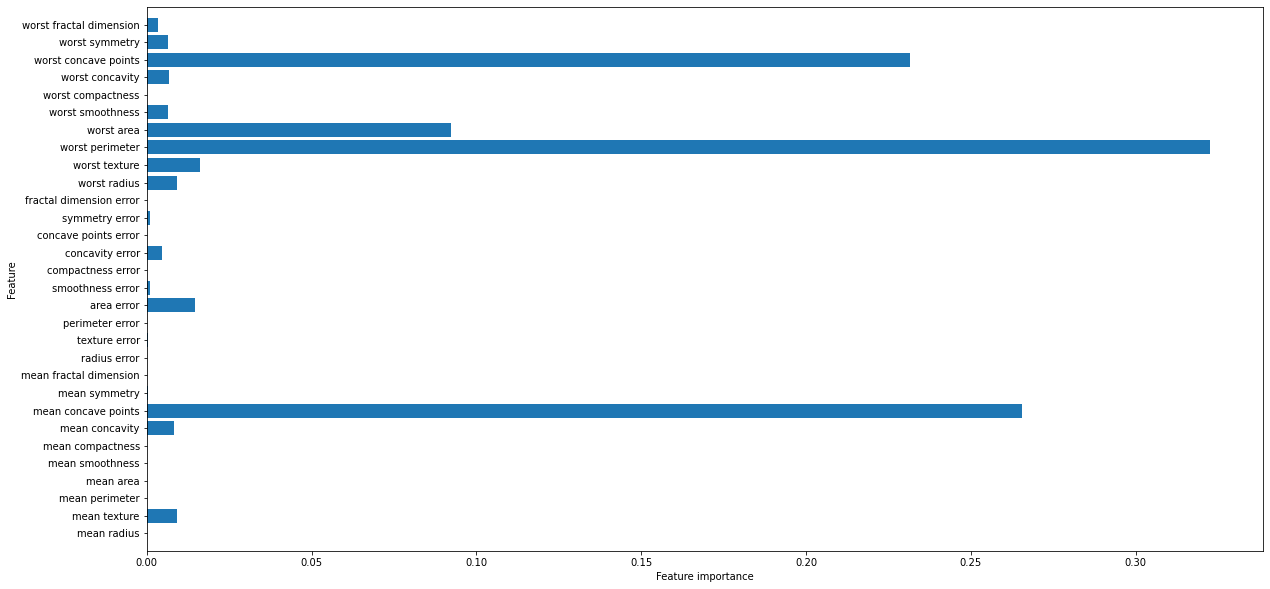

In [44]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)